# Simulating how long savings will last in retirement

How much should I save for retirement? There are many ways one could approach such a question.

This notebook shows one such answer, or at least provides some guidance on making such a decision. The idea is to perform a simulation of the retirement period:

   * starting with the money that the retiree has saved,
   * drawing this savings down year-by-year by the amount of yearly expenses,
   * adding to the savings according to investment returns in stocks and bonds, 
   * adjusting the expenses for the effects of inflation, and
   * ending the simulation at the death of the retiree or when they have run out of money.

The computer simulation is performed with the Monte Carlo method, which is a fancy way of saying that we repeatedly compute the possible outcome using probabilities and chance. The probabilities for the investment returns and inflation come from historical economic data, while the probability for the retiree's life expectancy come from life tables.

This Python software automates such simulation. This notebook walks through an example simulation for a fictitious woman named Joyce.

https://anaconda.org/conda-forge/uncertainties

    conda install -c conda-forge uncertainties 

## Setting up the inputs for the simulation

We need to provide a few details about Joyce. The first details are about her financial situation.

In [1]:
# First, let's assume that Joyce needs $50k per year (before taxes) to live on.
yearly_expense = 50000.00

# Next, Joyce has saved half a million dollars for retirement.
starting_assets = 500000.00

# And Joyce invests half of her money in stocks and half in bonds.
stock_fraction = 0.5

For the life expectancy part of the simulation, we must specify some age and demographic details about Joyce.

The last two details are used to find the appropriate life expectancy data from the CDC. Other possible demographic groups include `male`, `female`, `white male`, `black male`, `white female`, `black female`.

In [2]:
# Joyce will retire at age 65.
starting_age = 65

# She lives in Iowa.
state_abbrev = 'IA'

# Joyce is a white female. 
demographic_group = 'white female'

## Running a simple simulation

To get an idea of how this simulation works, we will run a simple one at first.

 Chance of running out of money is (75.0+/-1.4)%


0.75+/-0.013693063937629152

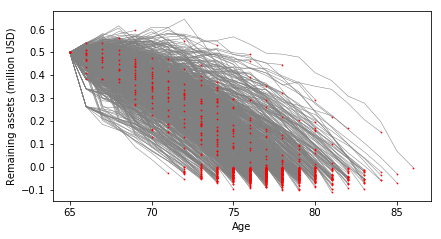

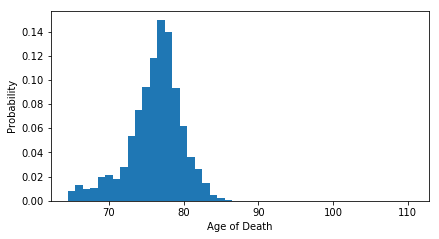

In [6]:
%matplotlib inline
import retirement_mc
retirement_mc.run_histories(starting_assets, yearly_expense, stock_fraction, starting_age,
              state_abbrev, demographic_group,
              n_mc=1000, plotting=True, verbose=True)


Because we performed the simulation with `plotting=True`, we get two plots of the results. The second plot is the easier to understand; it is the probability of Joyce dying at each year of her life based on the CDC life tables. She is most likely to die in her late 70s.

The first plot shows the histories of the simulations. Each gray line represents a possible path that Joyce's investments may have taken. The red dot represents the end of Joyce's life for each simulation. We would hope that she has money left over (that the remaining assets is positive) when she dies, but in this simulation, many of the possibilities lead to Joyce running out of money.

Notice that the probability of Joyce running out of money is stated as about 75%. With a 75% chance of running out of money, Joyce should probably work a few more years, work part time in retirement, or reduce her yearly expenses.

Note also that the probability is quoted as 74.7±1.4. The second quantity, the ±1.4, comes from the uncertainty in the Monte Carlo simulation. As more possibilities are simulated, this statistical error will be reduced. The number of histories is controlled by the `n_mc` parameter.

You can compare the results of this simulation with the similar calculation on Vanguard's website.

## How much should Joyce save?

We could rerun the simulation by hand for various combinations of these variables, but this software package provides an automated way to do this. The result is the amount to save, and a series of sensitivity plots, which show how each input variable effects the result.

 You should save $1.69 million.


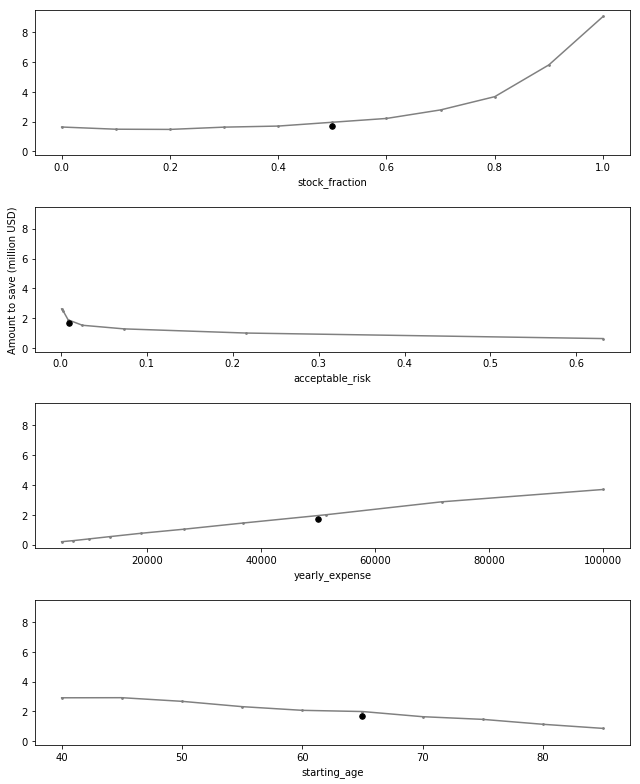

In [7]:
# One more input: what level of risk of running out
#  of money is Joyce comfortable with? Let's say it is 1%.
acceptable_risk = 0.01  # = 1%

sens_fig = retirement_mc.sensitivity_plots(acceptable_risk=acceptable_risk,
                                           yearly_expense=yearly_expense,
                                           stock_fraction=stock_fraction,
                                           starting_age=starting_age,
                                           state_abbrev=state_abbrev,
                                           demographic_group=demographic_group,
                                           verbose=True,
                                          )

The black dot shows the location of the input values. The line shows how sensitive the amount to save (plotted on the _y_ axis) is to each (numerical) input variable. These plots are generated by keeping all the other input values constant and varying only the input of interest.

## Another way to look at the results: a cascade plot

In addition to the sensitivity plot, we can also generate what I'll call a _cascade plot_, which show the probability for outliving her savings for a variety of starting asset sizes. Let's generate the plot.

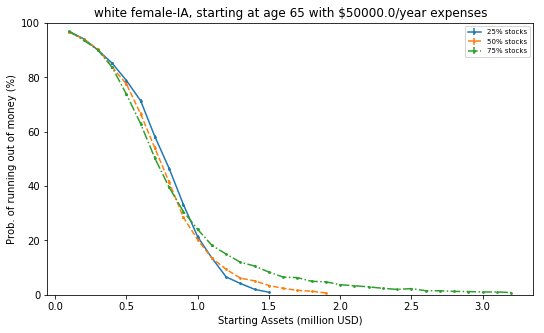

In [8]:
casc_fig = retirement_mc.cascade_plot(yearly_expense,
                                      stock_fraction,
                                      starting_age,
                                      state_abbrev,
                                      demographic_group)

I call it a cascade plot because it looks a little like a waterfall. The top of the cascade represents the starting savings sizes for which Joyce has a very high chance of outliving her retirement savings. On the other hand, the bottom of the waterfall represents those starting asset sizes for which Joyce has a low chance of outliving her savings.

How much should she save to retire? That depends on her level of comfort with risk. If she is comfortable with a 5% risk of running out of money, she could retire on about $1.25 million, with 25-50% in stocks. If she would rather a 1% risk, she should save closer to 1.5 million USD.